# Can our data be modelled? 
This project takes a look at a crude measure of mine(nameless currently) for determining if the data can be modeled via computation.

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [44]:
#Read and preprocess data
dataset = pd.read_csv("insurance.csv") #read the dataset
features = dataset.iloc[:,0:6]
labels = dataset.iloc[:,-1] 
features = pd.get_dummies(features)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)
#Standardize
ct = ColumnTransformer([('standardize', StandardScaler(), ['age', 'bmi', 'children'])], remainder='passthrough')
features_train = ct.fit_transform(features_train)
features_test = ct.transform(features_test)

In [45]:
def more_complex_model(X, nodes, learning_rate):
    model = Sequential(name="model")
    input = tf.keras.Input(shape=(X.shape[1],))
    model.add(input)
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

In [46]:
def fit_model(model, f_train, l_train, learning_rate, num_epochs):
    #train the model on the training data
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)
    history = model.fit(features_train, labels_train, epochs=num_epochs, batch_size= 2, verbose=0, validation_split = 0.2, callbacks = [es])
    return history

In [47]:
def plot(history):
    # plot learning curves
    fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 1, 'wspace': 1}) 
    (ax1, ax2) = axs
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='validation')
    ax1.set_title('lrate=' + str(learning_rate))
    ax1.legend(loc="upper right")
    ax1.set_xlabel("# of epochs")
    ax1.set_ylabel("loss (mse)")

    ax2.plot(history.history['mean_absolute_error'], label='train')
    ax2.plot(history.history['val_mean_absolute_error'], label='validation')
    ax2.set_title('lrate=' + str(learning_rate))
    ax2.legend(loc="upper right")
    ax2.set_xlabel("# of epochs")
    ax2.set_ylabel("MAE")
    print("Final training MAE:", history.history['mean_absolute_error'][-1])
    print("Final validation MAE:", history.history['val_mean_absolute_error'][-1])

In [48]:
learning_rate = 0.1
num_epochs = 200
nodes = [8,64]
model_histories = []

In [49]:
#fit the models
for i in range(len(nodes)):
  print(f"Results of a model with {nodes[i]} nodes in hidden layer:")
  model_histories.append(fit_model(more_complex_model(features_train, nodes[i], learning_rate), features_train, labels_train, learning_rate, num_epochs))

Results of a model with 8 nodes in hidden layer:
Epoch 00051: early stopping
Results of a model with 64 nodes in hidden layer:
Epoch 00046: early stopping


Final training MAE: 2867.7803
Final validation MAE: 2873.6836


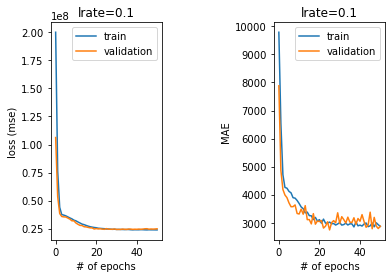

In [50]:
plot(model_histories[0])
#plt.savefig('plot2.png')

# What does the Early stopping Mean here? - Computationally Reducible¶
So the less computationally heavy model of 8 nodes takes a longer time to reach a certain number of epochs where no more improvements are made. So what does this mean? Well, it means that we have a problem that at first glance looks as if it does have computationally reducibility. That is there are ways of applying computation to this problem and get an answer. 
That is great in general. We may not get a good answer but we are not wasting our time on something that cannot give any answers!

This is another of my metrics, currently a bit crude. It is the delta of epochs between the two complex models that matter, small distance points to data that cannot be reduced substantially by computation. The distances as a measure ought to be important somehow but it eludes me how. That is a model that has x more complexity needs z fewer computations. The exact relationship needs work. If I have completely random data, both the models would soon give up. That is, they would both finish quite quickly and at about the same number of epochs declaring nothing can be done. I'll do a small project and publish that as well in time.

In [51]:
#print(history2.history.keys())